In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

#  $Лабораторная$ $работа$ $5.1.2$ 
# $Исследование$ $эффекта$ $Комптона$
    
# $Цель$ $работы:$
C помощью сцинтилляционного спектрометра исследуется энергетический спектр $\gamma$-квантов, рассеянных на графите. Определяется энергия рассеянных $\gamma$-квантов в зависимости от угла рассеяния, а также энергия покоя частиц, на которых происходит комптоновское рассеяние.


# $Теоретическая$ $часть$
Эффект Комптона -- увеличение длины волны рассеянного излучения по сравнению с падающим -- интерпретируется как результат упругого соударения двух частиц: $\gamma$-кванта и свободного электрона.

Из закона сохранения 4-имульса для системы <<фотон + электрон>> следует формула для изменения длины волны рассеянного излучения:
\begin{equation}
    \label{Kompton}
    \tag{$\star$}
    \Delta \lambda = \Lambda_K(1-\cos\theta),
\end{equation}
где величина $\Lambda_K = h/(mc) = 2,42 \cdot 10^{-10}$ см называется комптоновской длиной волны электрона.

Из формулы (\ref{Kompton}) следует, что комптоновское смещение не зависит ни от длины волны первичного излучения, ни от рода вещества, в котором наблюдается рассеяние. В общем случае комптоновоское рассеяние происходит на свободных электронах в атоме. Для $\gamma$-квантов с энергией в несколько десятков, а тем более сотен килоэлектрон-вольт, связь электронов в атоме мало существенна, так как энергрия их связи в легких атомах не превосходит нескольких килоэлектрон-вольт, а для большинства электронов еще меньше.

При рассеянии на связанных электронах изменение импульса кванта воспринимается атомом в целом. Посколько масса атома очень велика, переда ча импульса не спровождается сколь-нибудь заметной передачей энергии, и наблюдается несмещенная (по энергии) компонента в спектре рассеянного излучения. Таким образом, рассеяние $\gamma$-квантов на связанных электронах можно рассматривать как упругое столкновение квантов с атомами.

Основной целью данной работы является проверка соотношения (\ref{Kompton}). Применительно к условиям нашего опыта формулу (\ref{Kompton}) следует преобразовать от длин волн к энергиям $\gamma$-квантов. Как нетрудно показать, соответсвующиее выражение имеет вид:
\begin{equation}
    \label{1-cos}
    \tag{$\star\star$}
    \frac{1}{\varepsilon(\theta)} - \frac{1}{\varepsilon_0} = 1 - \cos \theta.
\end{equation}

Здесь $\varepsilon_0 = E_0/(mc^2)$ -- выраженная в единицах $(mc^2)$ энергия $\gamma$-квантов, падающих на рассеиватель, $\varepsilon(\theta)$ -- выраженная в тех же единицах энергия квантов, испытавших комптоновское рассеяние на угол $\theta$, $m$ -- масса электрона.

Заменим в формуле (\ref{1-cos}) энергию квантов, испытавших комптоновское рассеяние на угол $\theta$, номером канала $N(\theta)$, соответствующего вершине фотопика при указанном угле $\theta$:
        $\frac{1}{N(\theta)} - \frac{1}{N(0)} = A (1- \cos \theta),$
    где $A$ -- неизвестный коэффциицент пропорциональности между $\varepsilon(\theta)$ и $N(\theta)$.



<br></br>

# $Выполнение$

In [2]:
alpha = np.array([0, 11, 20, 30, 40, 50, 60, 70, 85, 100, 110])
true_alpha = np.pi * alpha / 180
channel = np.array([800, 790, 701, 656, 610, 525, 474, 407, 320, 309, 283])
cos = 1 - np.cos(true_alpha)
n = 1/channel * 10**3
q_channel = np.array([5, 2, 3, 5, 7, 4, 2, 7, 10, 10, 5])
data = {"$ \theta,^\circ$": alpha, "$\sigma_\theta,^\circ$": np.array([0.5] * len(alpha)), 
        "$channel$": channel, "$\sigma_{channel}$": q_channel}
alpha_channel = pd.DataFrame(data)



# $Результаты$ $измерений$

In [3]:
display(alpha_channel.T)

,0,1,2,3,4,5,6,7,8,9,10
"$ \theta,^\circ$",0.0,11.0,20.0,30.0,40.0,50.0,60.0,70.0,85.0,100.0,110.0
"$\sigma_\theta,^\circ$",0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
$channel$,800.0,790.0,701.0,656.0,610.0,525.0,474.0,407.0,320.0,309.0,283.0
$\sigma_{channel}$,5.0,2.0,3.0,5.0,7.0,4.0,2.0,7.0,10.0,10.0,5.0


# $Обработка$ $результатов$
## $Связь$ $номера$ $канала$ $пика$ $с$ $углом$
### $ \sigma_{1-\cos \theta} = \sin \theta \cdot \sigma_\theta, \ \sigma_{1/N} = 1/N^2 \cdot \sigma_N.$

,0,1,2,3,4,5,6,7,8,9,10
$1/N * 10^3$,1.250000,1.265823,1.426534,1.524390,1.639344,1.904762,2.109705,2.457002,3.125000,3.236246,3.533569
$\sigma_{1/N}*10^3$,0.007812,0.003205,0.006105,0.011619,0.018812,0.014512,0.008902,0.042258,0.097656,0.104733,0.062431
$ 1 - cos\theta $,0.000000,0.018373,0.060307,0.133975,0.233956,0.357212,0.500000,0.657980,0.912844,1.173648,1.342020
$\sigma_{1 - cos\theta}$,0.000000,0.028621,0.051303,0.075000,0.096418,0.114907,0.129904,0.140954,0.149429,0.147721,0.140954


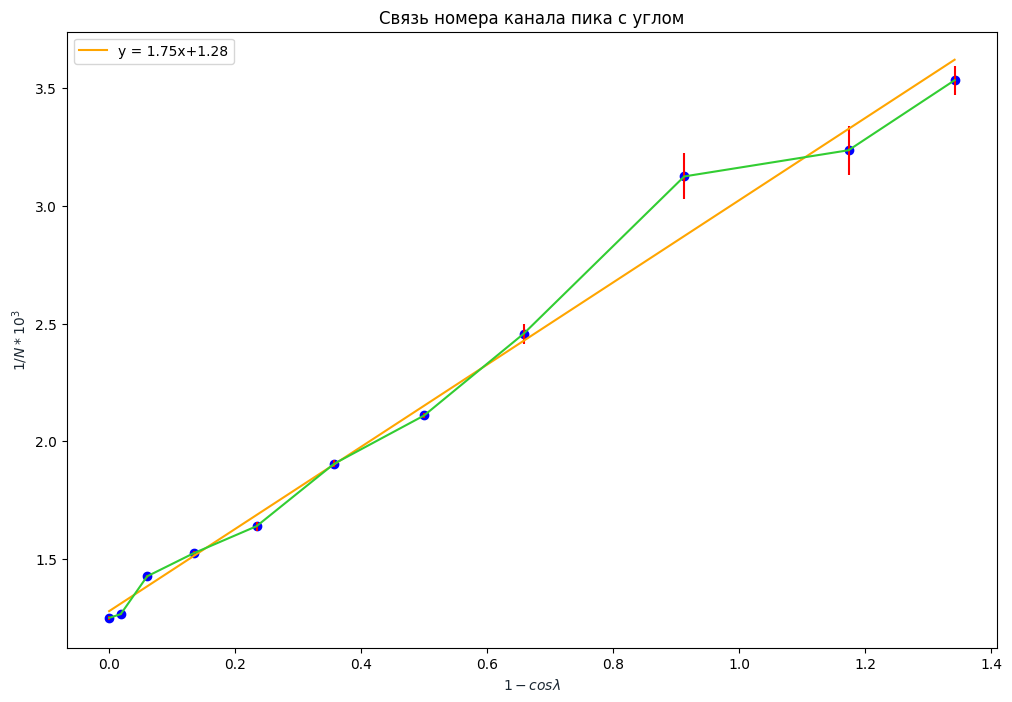

In [34]:
import matplotlib.colors as mcolors

plt.figure(figsize=(12,8))
plt.ylabel('$1/N * 10^3$', color='#1C2833')
plt.xlabel('$ 1 - cos\lambda $', color='#1C2833')
plt.title("Связь номера канала пика с углом")
plt.plot(cos, n, "o", color = 'blue')
q_cos = np.sin(true_alpha) * 0.15
q_n = 1/(channel**2) * q_channel
plt.errorbar(cos, n, q_n*1000, ecolor='red', color='limegreen')
data = {"$1/N * 10^3$": n, "$\sigma_{1/N}*10^3$": q_n*10**3,  
        "$ 1 - cos\theta $": cos, "$\sigma_{1 - cos\theta}$": q_cos}
x=np.array(cos)
y=np.array(n)
a, b = np.polyfit(x,y,1)
# y = ax + b
lines = plt.plot(cos, a*cos + b, color='orange')
plt.legend(lines, ['y = {:.3}x+{:.3}'.format(a,b)])


display(pd.DataFrame(data).T)

# $Выводы$
Итак, в настоящей лабораторной работе нами была проведена проверка соотношения $\Delta \lambda = \Lambda_K(1-\cos\theta)$. Экспериментально установлено, что $\gamma$-кванты действительно испытывают упругое рассеяние на свободных частицах. 

Обратим наше внимание на то, что с увеличением угла $\theta$ погрешность измерения номера канала $\sigma_N$ увеличивается, что связано со смещением фотопика в сторону сплошного распределения, обязанного комптоновскому рассеянию.

На основании таблицы полученных данных можно определить энергию покоя частиц, на которых происходит комптоновское рассеивание. Путем несложных преобразований формула ${\star}$ принимает вид:
\begin{equation*}
    mc^2 = E(0) \frac{N(90)}{N(0)-N(90)},
\end{equation*}
где $E(0)$ -- энергия $\gamma$-лучей, испускаемых источником (в нашем случае $^{137}$Cs), то есть 662 кэВ. <br></br>
Имеем:
$\boxed{mc^2 = 430 \pm 20 \ \text{кэВ}}.$
Видно, что результат на 16\% меньше 511 кэВ - энергии покоя электрона. 

\end{document}